In [1]:
import os
import math
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

from numpy import save
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler


%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Nahrání dat

## Záznamy z kosu

In [2]:
data_file = 'data_apr_17'

In [3]:
path_file = os.sep.join([data_file, 'prihlaska_dim.csv'])
prihlaska_dim = pd.read_csv(path_file, sep=";") 

path_file = os.sep.join([data_file, 'klasifikace_fact.csv'])
klasifikace_fact = pd.read_csv(path_file, sep=";")

path_file = os.sep.join([data_file, 'predmet_dim.csv'])
predmet_dim = pd.read_csv(path_file, sep=";")

path_file = os.sep.join([data_file, 'zaverecne_prace_fact.csv'])
prace_fact = pd.read_csv(path_file, sep=";")

path_file = os.sep.join([data_file, 'szzk_dim.csv'])
szzk_dim = pd.read_csv(path_file, sep=";")

path_file = os.sep.join([data_file, 'student_dim.csv'])
student_dim = pd.read_csv(path_file, sep=";")

path_file = os.sep.join([data_file, 'studium_dim.csv'])
studium_dim = pd.read_csv(path_file, sep=";")

path_file = os.sep.join([data_file, 'semestr_dim.csv'])
semestr_dim = pd.read_csv(path_file, sep=";")

path_file = os.sep.join([data_file, 'zaverecne_prace_dilci_hodnoceni_dim.csv'])
hodnoceni_dim = pd.read_csv(path_file, sep=";")

path_file = os.sep.join(['created_data', 'klasifikace_fact_changed.csv'])
klasifikace_fact_changed = pd.read_csv(path_file, sep=",")

## Nahrání dat o předmětech z Bílé knihy

In [4]:
# bakalar vsechny povinne spolecne predmety
path_file = os.sep.join(['predmety', 'courses_baks.csv'])
courses_baks = pd.read_csv(path_file, sep=",")

# magistr vsechny povinne spolecne predmety
path_file = os.sep.join(['predmety', 'courses_mag.csv'])
courses_mag = pd.read_csv(path_file, sep=",")

# bakalar vsechny specializace
path_file = os.sep.join(['predmety', 'courses_bak_spec.csv'])
courses_bak_spec = pd.read_csv(path_file, sep=",")

# magistr vsechny specializace
path_file = os.sep.join(['predmety', 'courses_mag_spec.csv'])
courses_mag_spec = pd.read_csv(path_file, sep=",")

# bakalar
path_file = os.sep.join(['predmety', 'zi_1517_bak.csv'])
zi_1517_bak = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'wsi_wi_bak.csv'])
wsi_wi_bak = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'wsi_si_bak.csv'])
wsi_si_bak = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'wsi_pg_bak.csv'])
wsi_pg_bak = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'bit_bak.csv'])
bit_bak = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'zi_1820_bak.csv'])
zi_1820_bak = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'ti_bak.csv'])
ti_bak = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'ism_bak.csv'])
ism_bak = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'pi_bak.csv'])
pi_bak = pd.read_csv(path_file, sep=",")

# magistr
path_file = os.sep.join(['predmety', 'zi_1617_mag.csv'])
zi_1617_mag = pd.read_csv(path_file, sep=",") 

path_file = os.sep.join(['predmety', 'sp_1619_mag.csv'])
sp_1619_mag = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'wsi_si_mag.csv'])
wsi_si_mag = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'zi_1819_mag.csv'])
zi_1819_mag = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'npvs_mag.csv'])
npvs_mag = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'sp_1617_mag.csv'])
sp_1617_mag = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'pss_mag.csv'])
pss_mag = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'pb_mag.csv'])
pb_mag = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'wsi_ism_mag.csv'])
wsi_ism_mag = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'wsi_wi_mag.csv'])
wsi_wi_mag = pd.read_csv(path_file, sep=",")

## Nahrání dat o IZO kódech z tabulky MŠMT

In [5]:
path_file = os.sep.join(['skolaIZO', 'izos.pkl'])
with open(path_file, 'rb') as file:
    izos = pickle.load(file)

path_file = os.sep.join(['skolaIZO', 'red_izos.pkl'])
with open(path_file, 'rb') as file:
    red_izos = pickle.load(file)

## Odstranění duplikátů

In [6]:
# odstraneni duplikatu
student_dim.drop_duplicates(subset=['studium_id'], inplace=True)

## Odstranění zbytečných sloupců

In [7]:
prace_fact_o = prace_fact.copy(deep=True)
prace_fact = prace_fact.drop(columns=['nazev_cs', 'nazev_en'])

student_dim_o = student_dim.copy(deep=True)
student_dim = student_dim.drop(columns=['typ_adresy'])

studium_dim_o = studium_dim.copy(deep=True)
studium_dim = studium_dim.drop(columns=['zamereni_id', 
                                        'nazev_fakulty', 
                                        'fakulta_id', 
                                        'platby_stav', 
                                        'pruchod'])

hodnoceni_dim_o = hodnoceni_dim.copy(deep=True)
hodnoceni_dim = hodnoceni_dim.drop(columns=['predmet_cislo'])

# studium_dim

In [8]:
studium_dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16621 entries, 0 to 16620
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   studium_id       16621 non-null  int64  
 1   typ_programu     16621 non-null  object 
 2   forma_studia     13912 non-null  object 
 3   datum_zahajeni   16621 non-null  object 
 4   datum_ukonceni   14362 non-null  object 
 5   rocnik           16608 non-null  float64
 6   studijni_stav    16621 non-null  object 
 7   studuje          16621 non-null  object 
 8   jazyk_vyuky      16072 non-null  object 
 9   ukonceni_zpusob  14362 non-null  float64
 10  rok_maturity     11869 non-null  object 
 11  odkud_skola_kod  10963 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1.5+ MB


In [9]:
# prevedeni odkud_skola_kod na int
studium_dim.odkud_skola_kod = studium_dim.odkud_skola_kod.fillna(0)
studium_dim.odkud_skola_kod = studium_dim.odkud_skola_kod.astype(int)

In [10]:
# zmena datum_zahajeni pouze na rok a zmena ze stringu na int
studium_dim['datum_zahajeni'] = studium_dim['datum_zahajeni'].apply(lambda x: x.split('-')[0])

studium_dim['datum_ukonceni'] = studium_dim['datum_ukonceni'].fillna('0')
studium_dim['datum_ukonceni'] = studium_dim['datum_ukonceni'].apply(lambda x: x.split('-')[0])

studium_dim['rok_maturity'] = studium_dim['rok_maturity'].fillna('0')
studium_dim['rok_maturity'] = studium_dim['rok_maturity'].apply(lambda x: x.split('-')[0])

studium_dim['datum_zahajeni'] = pd.to_numeric(studium_dim['datum_zahajeni'])
studium_dim['datum_ukonceni'] = pd.to_numeric(studium_dim['datum_ukonceni'])
studium_dim['rok_maturity'] = pd.to_numeric(studium_dim['rok_maturity'])

In [11]:
# novy dataset, ktery propojuje studium_dim a student_dim
student_studium_dim = student_dim.merge(studium_dim, on='studium_id', how='inner')

In [12]:
# odstranění erasmus studentů, krátkodobé studijní pobyty, úmrtí
students_erasmus = student_studium_dim[(student_studium_dim.ukonceni_zpusob==60)].studium_id.unique()
students_short = student_studium_dim[(student_studium_dim.ukonceni_zpusob==20)].studium_id.unique()
students_dead = student_studium_dim[(student_studium_dim.ukonceni_zpusob==8)].studium_id.unique()

student_studium_dim = student_studium_dim[(~student_studium_dim.studium_id.isin(students_erasmus))
                         & (~student_studium_dim.studium_id.isin(students_short))
                         & (~student_studium_dim.studium_id.isin(students_dead))]

In [13]:
# kontrola, jestli existuje ve studium_dim vice zaznamu se stejnym studium_id
ids = student_studium_dim['studium_id']
student_studium_dim[ids.isin(ids[ids.duplicated()])]

,studium_id,peridno,pohlavi_kod,datum_narozeni,misto_narozeni,statni_prislusnost_nazev,stat_narozeni_nazev,kod_obce,kod_okresu,kod_zeme,psc,typ_programu,forma_studia,datum_zahajeni,datum_ukonceni,rocnik,studijni_stav,studuje,jazyk_vyuky,ukonceni_zpusob,rok_maturity,odkud_skola_kod


In [14]:
# ponechat je student_studium_dim pouze studenty v CJ a prezencni forme bez studentu nove akreditace
student_studium_dim = student_studium_dim[(student_studium_dim['jazyk_vyuky'] == 'CS')
                             & (student_studium_dim['forma_studia'] == 'P')
                             & (student_studium_dim['datum_zahajeni'] < 2021)]

In [15]:
# jen studenti, kteri nastoupili od roku 2015 resp. 2016
# bakalar
student_studium_dim_bak_2015 = student_studium_dim[(student_studium_dim['datum_zahajeni'] >= 2015)
                             & (student_studium_dim['typ_programu'] == 'B')]
# magistr
student_studium_dim_mag_2016 = student_studium_dim[(student_studium_dim['datum_zahajeni'] >= 2016)
                             & (student_studium_dim['typ_programu'] == 'N')]

# studenti rozdeleni na bakalarske a magisterske
# bakalar
student_studium_dim_bak = student_studium_dim[(student_studium_dim['typ_programu'] == 'B')]
# magistr
student_studium_dim_mag = student_studium_dim[(student_studium_dim['typ_programu'] == 'N')]

# id techto studentu 
student_studium_id_bak_2015 = student_studium_dim_bak_2015['studium_id'].unique()
student_studium_id_mag_2016 = student_studium_dim_mag_2016['studium_id'].unique()

student_studium_id_bak = student_studium_dim_bak['studium_id'].unique()
student_studium_id_mag = student_studium_dim_mag['studium_id'].unique()

In [16]:
path_file = os.sep.join(['created_data', 'student_studium_dim.csv'])
student_studium_dim.to_csv(path_file, index=False)

## Přidání informace o střední škole

In [17]:
student_studium_dim['gymnazium'] = 0
student_studium_dim.loc[(student_studium_dim.odkud_skola_kod.isin(izos)) |
            (student_studium_dim.odkud_skola_kod.isin(red_izos)), 'gymnazium'] = 1
student_studium_dim.loc[(student_studium_dim.odkud_skola_kod == 0), 'gymnazium'] = -1

# Student_dim

## Přidání informace o tom, jestli jsou z Prahy

In [18]:
student_studium_dim['praha'] = 0
student_studium_dim.loc[(student_studium_dim.kod_obce == 554782) |
            (student_studium_dim.kod_okresu == 3100), 'praha'] = 1
student_studium_dim.loc[(student_studium_dim.kod_obce.isna()) |
            (student_studium_dim.kod_okresu.isna()), 'praha'] = -1

In [19]:
student_studium_dim.praha.value_counts()

 0    6229
 1    2916
-1    1897
Name: praha, dtype: int64

# prihlaska_dim

In [20]:
prihlaska_dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5081 entries, 0 to 5080
Data columns (total 97 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cislo_prihlasky              5081 non-null   int64  
 1   odkud_uchazec_prihlasen_kod  2357 non-null   float64
 2   prihlaska_kod                5081 non-null   int64  
 3   studium_id                   5081 non-null   int64  
 4   rozhodnuti_kod               5076 non-null   float64
 5   obor_ss_kod                  1302 non-null   object 
 6   ss_izo                       1826 non-null   float64
 7   ss_typ                       1813 non-null   float64
 8   ss_predmet1                  65 non-null     object 
 9   ss_predmet2                  61 non-null     object 
 10  ss_predmet3                  1 non-null      object 
 11  ss_predmet4                  1 non-null      object 
 12  ss_predmet5                  0 non-null      float64
 13  ss_predmet1_znamky

## Přidání informace o tom, jak byli přijati

In [21]:
stud_olym = prihlaska_dim[(prihlaska_dim.rozhodnuti_kod == 11)
                           | (prihlaska_dim.hodnoceni_pz_cast6.notna())
                           | (prihlaska_dim.olympiady.notna())].studium_id.unique()

In [22]:
stud_scio = prihlaska_dim[(prihlaska_dim.rozhodnuti_kod == 13)
                           | (prihlaska_dim.hodnoceni_pz_cast7.notna())
                           | (prihlaska_dim.scio_test.notna())].studium_id.unique()

In [23]:
stud_zk = prihlaska_dim[(prihlaska_dim.rozhodnuti_kod == 10)
                           | (prihlaska_dim.rozhodnuti_kod == 12)
                           | (prihlaska_dim.hodnoceni_pz_cast2.notna())].studium_id.unique()

In [24]:
stud_prominuti = prihlaska_dim[(prihlaska_dim.hodnoceni_pz_cast1.notna())].studium_id.unique()

In [25]:
student_studium_dim['olym'] = 0
student_studium_dim['scio'] = 0
student_studium_dim['zkouska'] = 0
student_studium_dim['prominuti'] = 0
student_studium_dim.loc[(student_studium_dim.studium_id.isin(stud_olym)), 'olym'] = 1
student_studium_dim.loc[(student_studium_dim.studium_id.isin(stud_scio)), 'scio'] = 1
student_studium_dim.loc[(student_studium_dim.studium_id.isin(stud_zk)), 'zkouska'] = 1
student_studium_dim.loc[(student_studium_dim.studium_id.isin(stud_prominuti)), 'prominuti'] = 1

## Doplnění stud_praha pomocí informací z prihlaska_dim

In [26]:
studs_nan_kod = student_studium_dim[(student_studium_dim.kod_obce.isna()) | (student_studium_dim.kod_okresu.isna())]['studium_id'].unique()

In [27]:
studs_notna_kod_pri = prihlaska_dim[((prihlaska_dim.okres_kod.notna()) | (prihlaska_dim.misto_kod.notna()))
                       & (prihlaska_dim.studium_id.isin(studs_nan_kod)) 
                       & (((prihlaska_dim.misto_kod.notna())
                          &(prihlaska_dim.misto_kod.str.contains('Praha', case=False)))
                             | (prihlaska_dim.okres_kod == 3100)
                                  )].studium_id.unique()

student_studium_dim.loc[(student_studium_dim.studium_id.isin(studs_notna_kod_pri)), 'praha'] = 1

In [28]:
student_studium_dim.praha.value_counts()

 0    6229
 1    2917
-1    1896
Name: praha, dtype: int64

## Doplnění stud_gym pomocí informací z prihlaska_dim

In [29]:
studs_gym_pri = prihlaska_dim[(prihlaska_dim.ss_typ == 2)
                       | (prihlaska_dim.obor_ss_kod.str.contains('K', case=False))
                        | (prihlaska_dim.stupen_predchoziho_vzdelani == 'K')].studium_id.unique()

student_studium_dim.loc[(student_studium_dim.studium_id.isin(studs_gym_pri)), 'gymnazium'] = 1

In [30]:
studs_not_gym_pri = prihlaska_dim[((prihlaska_dim.obor_ss_kod.notna())
                                        & (prihlaska_dim.obor_ss_kod.str.contains('K', case=False) == False))
                                  | ((prihlaska_dim.stupen_predchoziho_vzdelani != 'K')
                                        & (prihlaska_dim.stupen_predchoziho_vzdelani.notna()))].studium_id.unique()
student_studium_dim.loc[(student_studium_dim.studium_id.isin(studs_not_gym_pri)), 'gymnazium'] = 0

In [31]:
student_studium_dim.gymnazium.value_counts()

 1    4560
 0    4190
-1    2292
Name: gymnazium, dtype: int64

# Předměty

## Pomocné proměnné k předmětům

In [32]:
# id a kody relevantních předmětů (od roku 2015, resp. 2016, jen PP / PO)
courses_kod_bak_spec = courses_bak_spec["kod_predmetu"].unique()
courses_bak_spec = predmet_dim[(predmet_dim['kod_predmetu'].isin(courses_kod_bak_spec))].loc[:, ['kod_predmetu', 'predmet_id']]
courses_id_bak_spec = courses_bak_spec['predmet_id'].unique()

courses_kod_mag_spec = courses_mag_spec["kod_predmetu"].unique()
courses_mag_spec = predmet_dim[(predmet_dim['kod_predmetu'].isin(courses_kod_mag_spec))].loc[:, ['kod_predmetu', 'predmet_id']]
courses_id_mag_spec = courses_mag_spec['predmet_id'].unique()

In [33]:
#pomocne slovniky

#slovnik predmet_id: kod_predmetu
courses_tran_id_kod = dict()
for index, row in predmet_dim.iterrows():
    courses_tran_id_kod[row['predmet_id']] = row['kod_predmetu']
    
#slovnik kod_predmetu: predmet_id
courses_tran_kod_id = dict()
for index, row in predmet_dim.iterrows():
    courses_tran_kod_id[row['kod_predmetu']] = row['predmet_id']

In [34]:
path_file = os.sep.join(['created_data', 'courses_tran_id_kod.pkl'])
file = open(path_file, 'wb')
pickle.dump(courses_tran_id_kod, file)
file.close()

path_file = os.sep.join(['created_data', 'courses_tran_kod_id.pkl'])
file = open(path_file, 'wb')
pickle.dump(courses_tran_kod_id, file)
file.close()

In [35]:
#pomocna promenna array vsech pp bak pred
courses_baks = courses_baks[(courses_baks['kod_predmetu'] != 'BI-BAP')
                            & (courses_baks['kod_predmetu'] != 'BI-BPR')]
courses_kod_bak = courses_baks['kod_predmetu'].unique()

#pomocna promenna array vsech pp mag pred
courses_mag = courses_mag[(courses_mag['kod_predmetu'] != 'MI-MPR')
                            & (courses_mag['kod_predmetu'] != 'MI-DIP')]
courses_kod_mag = courses_mag['kod_predmetu'].unique()
    
courses_id_bak = []
for course in courses_kod_bak:
    courses_id_bak.append(courses_tran_kod_id[course])

courses_id_mag = []
for course in courses_kod_mag:
    courses_id_mag.append(courses_tran_kod_id[course])

In [36]:
# predmety podle doporuceneho semestru
courses_1 = ['BI-PA1', 'BI-PAI', 'BI-CAO', 'BI-PS1', 'BI-MLO', 'BI-ZMA']
courses_2 = ['BI-PA2', 'BI-DBS', 'BI-SAP', 'BI-LIN']
courses_3 = ['BI-AAG', 'BI-ZDM', 'BI-AG1']
courses_4 = ['BI-OSY', 'BI-PSI', 'BI-BEZ']
courses_5 = ['BI-PST']
courses_6 = ['BI-DPR']
courses_7 = ['BI-SI1.2', 'BI-EMP']

courses = courses_1 + courses_2 + courses_3 + courses_4 + courses_5 + courses_6 + courses_7

In [37]:
# predmety podle doporuceneho semestru id
courses_1_id = []
for course in courses_1:
    courses_1_id.append(courses_tran_kod_id[course])
courses_2_id = []
for course in courses_2:
    courses_2_id.append(courses_tran_kod_id[course])
courses_3_id = []
for course in courses_3:
    courses_3_id.append(courses_tran_kod_id[course])
courses_4_id = []
for course in courses_4:
    courses_4_id.append(courses_tran_kod_id[course])
courses_5_id = []
for course in courses_5:
    courses_5_id.append(courses_tran_kod_id[course])
courses_6_id = []
for course in courses_6:
    courses_6_id.append(courses_tran_kod_id[course])
courses_7_id = []
for course in courses_7:
    courses_7_id.append(courses_tran_kod_id[course])

courses_id = courses_1_id + courses_2_id + courses_3_id + courses_4_id + courses_5_id + courses_6_id + courses_7_id

In [38]:
# Pokud nevime pocet kreditu, je pocet kreditu doplnen nulou
predmet_dim.pocet_kreditu = predmet_dim.pocet_kreditu.fillna(0)

# Klasifikace

## klasifikace_fact

In [39]:
# Ulozeni stareho nepozmeneneho datasetu
klasifikace_fact_o = klasifikace_fact.copy(deep=True)

## Propojení předmětů přes akreditace

In [40]:
# PA1
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIK-PA1'], 
      courses_tran_kod_id['BIE-PA1'], 
      courses_tran_kod_id['BI-PA1.21'], 
      courses_tran_kod_id['BIE-PA1.21'],
      courses_tran_kod_id['BIK-PA1.21']],
     
      courses_tran_kod_id['BI-PA1']
     )

#PAI
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIK-PAI'], 
      courses_tran_kod_id['BIE-PAI'], 
      courses_tran_kod_id['BI-PAI.21'], 
      courses_tran_kod_id['BIE-PAI.21'],
      courses_tran_kod_id['BIK-PAI.21']],
     
      courses_tran_kod_id['BI-PAI']
     )

#ZMA
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIK-ZMA'], 
      courses_tran_kod_id['BIE-ZMA']],
     
    courses_tran_kod_id['BI-ZMA']
     )
klasifikace_fact

#CAO
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIK-CAO'], 
      courses_tran_kod_id['BIE-CAO'], 
      courses_tran_kod_id['BI-TZP.21'], 
      courses_tran_kod_id['BIE-TZP.21'],
      courses_tran_kod_id['BIK-TZP.21']],
     
      courses_tran_kod_id['BI-CAO']
     )

#CAO
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BI-UOS'], 
      courses_tran_kod_id['BIE-UOS'], 
      courses_tran_kod_id['BIK-UOS'], 
      courses_tran_kod_id['BI-UOS.21'],
      courses_tran_kod_id['BIK-UOS.21'],
      courses_tran_kod_id['BIE-PS1'],
      courses_tran_kod_id['BIK-PS1'],
      courses_tran_kod_id['BIE-UOS.21']],
     
      courses_tran_kod_id['BI-PS1']
     )

#MLO
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIK-MLO'], 
      courses_tran_kod_id['BIE-MLO']],
     
      courses_tran_kod_id['BI-MLO']
     )

#PA2
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-PA2'], 
      courses_tran_kod_id['BIK-PA2'], 
      courses_tran_kod_id['BI-PA2.21'], 
      courses_tran_kod_id['BIE-PA2.21'],
      courses_tran_kod_id['BIK-PA2.21']],
     
      courses_tran_kod_id['BI-PA2']
     )

#SAP
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-SAP'], 
      courses_tran_kod_id['BIK-SAP'], 
      courses_tran_kod_id['BI-SAP.21'], 
      courses_tran_kod_id['BIE-SAP.21'],
      courses_tran_kod_id['BIK-SAP.21']],
     
      courses_tran_kod_id['BI-SAP']
     )

#DBS
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-DBS'], 
      courses_tran_kod_id['BIK-DBS'], 
      courses_tran_kod_id['BI-DBS.21'], 
      courses_tran_kod_id['BIE-DBS.21'],
      courses_tran_kod_id['BIK-DBS.21']],
     
      courses_tran_kod_id['BI-DBS']
     )

#LIN
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['A0B01LAG'],
    courses_tran_kod_id['BIE-LIN'], 
      courses_tran_kod_id['BIK-LIN']],
     
      courses_tran_kod_id['BI-LIN']
     )

#AAG
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-AAG'], 
      courses_tran_kod_id['BIK-AAG'], 
      courses_tran_kod_id['BI-AAG.21'], 
      courses_tran_kod_id['BIE-AAG.21'],
      courses_tran_kod_id['BIK-AAG.21']],
     
      courses_tran_kod_id['BI-AAG']
     )

#ZDM
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-ZDM'], 
      courses_tran_kod_id['BIK-ZDM']],
     
      courses_tran_kod_id['BI-ZDM']
     )

#OSY
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-OSY'], 
      courses_tran_kod_id['BIK-OSY'], 
      courses_tran_kod_id['BI-OSY.21'], 
      courses_tran_kod_id['BIE-OSY.21'],
      courses_tran_kod_id['BIK-OSY.21']],
     
      courses_tran_kod_id['BI-OSY']
     )

#PSI
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-PSI'], 
      courses_tran_kod_id['BIK-PSI'], 
      courses_tran_kod_id['BI-PSI.21'], 
      courses_tran_kod_id['BIE-PSI.21'],
      courses_tran_kod_id['BIK-PSI.21']],
     
      courses_tran_kod_id['BI-PSI']
     )

#BEZ
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['A0M32IBE'],
    courses_tran_kod_id['BIE-BEZ'], 
      courses_tran_kod_id['BIK-BEZ']],
     
      courses_tran_kod_id['BI-BEZ']
     )

#PST
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-PST'], 
      courses_tran_kod_id['BIK-PST'], 
      courses_tran_kod_id['BI-PST.21'], 
      courses_tran_kod_id['BIE-PST.21'],
      courses_tran_kod_id['BIK-PST.21']],
     
      courses_tran_kod_id['BI-PST']
     )

#SI1.2
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-SI1'], 
      courses_tran_kod_id['BIK-SI1'], 
      courses_tran_kod_id['BI-SI1'], 
      courses_tran_kod_id['BIE-SI1.2'],
      courses_tran_kod_id['BIK-SI1.2'],
      courses_tran_kod_id['BIK-SWI.21'], 
      courses_tran_kod_id['BI-SWI.21'], 
      courses_tran_kod_id['BIE-SWI.21'], 
      courses_tran_kod_id['BI-ZSI']],
     
      courses_tran_kod_id['BI-SI1.2']
     )

#EMP
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-EMP'], 
      courses_tran_kod_id['BIK-EMP'], 
      courses_tran_kod_id['BI-EPD'], 
      courses_tran_kod_id['BIE-EPD'],
      courses_tran_kod_id['BIK-EPD'],
      courses_tran_kod_id['BIK-EPD.2'], 
      courses_tran_kod_id['BI-EPD.2'], 
      courses_tran_kod_id['BIE-EPD.2'], 
      courses_tran_kod_id['BI-EKP'], 
      courses_tran_kod_id['BIE-EKP'],
      courses_tran_kod_id['BIK-EKP'],],
     
      courses_tran_kod_id['BI-EMP']
     )

#DPR
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-DPR'], 
      courses_tran_kod_id['BIK-DPR'], 
      courses_tran_kod_id['BI-PPR'], 
      courses_tran_kod_id['BIE-PPR'],
      courses_tran_kod_id['BIK-PPR']],
     
      courses_tran_kod_id['BI-DPR']
     )


#AG1
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-AG1'], 
      courses_tran_kod_id['BIK-AG1']],
     
      courses_tran_kod_id['BI-AG1']
     )

## Doplnění klasifikace o známku F

In [41]:
klasifikace_fact_changed = klasifikace_fact.copy(deep=True)

# pokud je zapocteno, zakonceno i znamka nan, zmena znamky na 4
klasifikace_fact_changed.loc[(klasifikace_fact_changed.semestr_id != 'B212')
                     & (klasifikace_fact_changed.znamka.isna())
                     & (klasifikace_fact_changed.zapocteno != 'Z')
                     & (klasifikace_fact_changed.zakonceno.isna()), 'znamka'] = 4

# pokud je vyplnena znamka 4, doplneni zapocteno a zakonceno
klasifikace_fact_changed.loc[(klasifikace_fact_changed.znamka == 4), 'zapocteno'] = 0
klasifikace_fact_changed.loc[(klasifikace_fact_changed.znamka == 4), 'zakonceno'] = 0

# doplneni zakonceno na 1, pokud je znamka jina nez nan nebo 4
klasifikace_fact_changed.loc[(klasifikace_fact_changed.znamka != 4) 
                             & (klasifikace_fact_changed.znamka.notna()), 'zakonceno'] = 1

# Prepsani N a Z u zapocteno na 0 a 1
klasifikace_fact_changed.loc[(klasifikace_fact_changed.zapocteno == 'N'), 'zapocteno'] = 0
klasifikace_fact_changed.loc[(klasifikace_fact_changed.zapocteno == 'Z'), 'zapocteno'] = 1

In [42]:
# doplneni znamky 4, pokud je zapocteno 1 a zaroven zakonceno nan a zaroven znamka nan
# a zaroven se nejedna o predmety se zpusobem zakonceni Z nebo NIC
graded_courses = predmet_dim[(predmet_dim.zpusob_zakonceni != 'Z')
                            & (predmet_dim.zpusob_zakonceni != 'NIC')
                            & (predmet_dim.zpusob_zakonceni.notna())].predmet_id.unique()

klasifikace_fact_changed.loc[(klasifikace_fact_changed.semestr_id != 'B212')
                     & (klasifikace_fact_changed.znamka.isna())
                     & (klasifikace_fact_changed.zapocteno == 1)
                     & (klasifikace_fact_changed.zakonceno.isna())
                             & (klasifikace_fact_changed.predmet_id.isin(graded_courses)), 'znamka'] = 4

In [43]:
# doplneni zapocteno na 1, pokud neni znamka 4 a neni nan
klasifikace_fact_changed.loc[(klasifikace_fact_changed.znamka != 4) 
                             & (klasifikace_fact_changed.znamka.notna()), 'zapocteno'] = 1
# doplneni zapocteno na 1, pokud je znamka nan, ale zakonceno 1
klasifikace_fact_changed.loc[(klasifikace_fact_changed.zakonceno == 1)
                             & (klasifikace_fact_changed.znamka.isna()), 'zapocteno'] = 1
# doplneni zapocteno na 0, pokud je zakonceno 0 nebo znamka 4
klasifikace_fact_changed.loc[(klasifikace_fact_changed.zakonceno == 0)
                             | (klasifikace_fact_changed.znamka == 4), 'zapocteno'] = 0

In [44]:
# doplneni zakonceno na 0, pokud je zapocteno 0, nebo znamka 4
klasifikace_fact_changed.loc[(klasifikace_fact_changed.zapocteno == 0)
                             | (klasifikace_fact_changed.znamka == 4), 'zakonceno'] = 0

In [45]:
path_file = os.sep.join(['created_data', 'klasifikace_fact_changed.csv'])
klasifikace_fact_changed.to_csv(path_file, index=False)

## Seřazení klasifikace podle pořadí zápisu
* Důležité pokud si student daný předmět zapsal dvakrát

In [46]:
klasifikace_fact_changed = klasifikace_fact_changed.sort_values(by=['poradi_zapisu'])

## Pomocné proměnné a datasety

In [47]:
# vsichni studenti bez bakalarky a diplomky
klasifikace_fact_bak_09 = klasifikace_fact_changed[
    (klasifikace_fact_changed['studium_id'].isin(student_studium_id_bak))].sort_values(by=['poradi_zapisu'])

klasifikace_fact_mag_09 = klasifikace_fact_changed[
    (klasifikace_fact_changed['studium_id'].isin(student_studium_id_mag))].sort_values(by=['poradi_zapisu'])

In [48]:
path_file = os.sep.join(['created_data', 'klasifikace_fact_bak_09.csv'])
klasifikace_fact_bak_09.to_csv(path_file, index=False)
path_file = os.sep.join(['created_data', 'klasifikace_fact_mag_09.csv'])
klasifikace_fact_mag_09.to_csv(path_file, index=False)

# Rozdělení předmětů podle těžkosti

## Pouze podle rozložení známek

In [49]:
klasifikace_fact_bak_2015 = klasifikace_fact_bak_09[klasifikace_fact_bak_09.studium_id.isin(student_studium_id_bak_2015)]

In [50]:
grades = [1, 1.5, 2, 2.5, 3, 4]

In [51]:
PP_predmety_rozlozeni_znamek = pd.DataFrame(columns=grades, index=courses)

In [52]:
for course_id in courses_id:
    for grade in grades:
        PP_predmety_rozlozeni_znamek.loc[courses_tran_id_kod[course_id], grade] = klasifikace_fact_bak_2015[klasifikace_fact_bak_2015.predmet_id == course_id].znamka.value_counts()[grade]

In [53]:
PP_predmety_rozlozeni_znamek

,1.0,1.5,2.0,2.5,3.0,4.0
BI-PA1,316,266,520,707,638,2699
BI-PAI,155,460,1014,1197,789,975
BI-CAO,2004,1138,84,261,209,872
BI-PS1,322,326,562,801,869,2109
BI-MLO,219,449,876,969,238,2182
BI-ZMA,177,422,706,771,173,2989
BI-PA2,310,269,404,547,169,1742
BI-DBS,359,632,679,610,265,744
BI-SAP,904,326,287,528,364,825
BI-LIN,70,142,403,650,351,2107


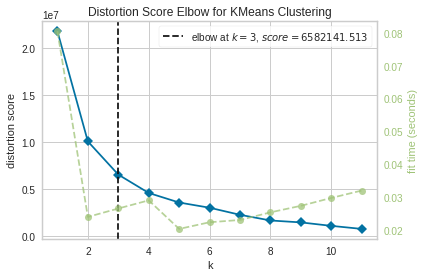

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(PP_predmety_rozlozeni_znamek)
visualizer.show()

In [55]:
km = KMeans(n_clusters=3).fit(PP_predmety_rozlozeni_znamek)

In [56]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = PP_predmety_rozlozeni_znamek.index.values
cluster_map['cluster'] = km.labels_

In [57]:
# jeden shluk tvori jenom predmet bi-cao
cluster_map

,data_index,cluster
0,BI-PA1,1
1,BI-PAI,0
2,BI-CAO,2
3,BI-PS1,1
4,BI-MLO,1
5,BI-ZMA,1
6,BI-PA2,1
7,BI-DBS,0
8,BI-SAP,0
9,BI-LIN,1


## Přidání info o tom jestli jsou matematické nebo programovací

In [58]:
PP_predmety_rozlozeni_znamek['matematika'] = 0
PP_predmety_rozlozeni_znamek['programovani'] = 0
math_courses = ['BI-MLO', 'BI-ZMA', 'BI-LIN', 'BI-ZDM', 'BI-PST']
programming_courses = ['BI-PA1', 'BI-PA2', 'BI-PS1', 'BI-AG1', 'BI-OSY']

In [59]:
PP_predmety_rozlozeni_znamek.loc[PP_predmety_rozlozeni_znamek.index.isin(math_courses), 'matematika'] = 1 
PP_predmety_rozlozeni_znamek.loc[PP_predmety_rozlozeni_znamek.index.isin(programming_courses), 'programovani'] = 1 

In [60]:
PP_predmety_rozlozeni_znamek

,1.0,1.5,2.0,2.5,3.0,4.0,matematika,programovani
BI-PA1,316,266,520,707,638,2699,0,1
BI-PAI,155,460,1014,1197,789,975,0,0
BI-CAO,2004,1138,84,261,209,872,0,0
BI-PS1,322,326,562,801,869,2109,0,1
BI-MLO,219,449,876,969,238,2182,1,0
BI-ZMA,177,422,706,771,173,2989,1,0
BI-PA2,310,269,404,547,169,1742,0,1
BI-DBS,359,632,679,610,265,744,0,0
BI-SAP,904,326,287,528,364,825,0,0
BI-LIN,70,142,403,650,351,2107,1,0


In [61]:
path_file = os.sep.join(['created_data', 'PP_predmety_rozlozeni_znamek.csv'])
PP_predmety_rozlozeni_znamek.to_csv(path_file, index=True)

In [62]:
# normalizace
scaler = MinMaxScaler()
PP_predmety_rozlozeni_znamek = pd.DataFrame(scaler.fit_transform(PP_predmety_rozlozeni_znamek[PP_predmety_rozlozeni_znamek.columns]), index=PP_predmety_rozlozeni_znamek.index, columns=PP_predmety_rozlozeni_znamek.columns)

In [63]:
PP_predmety_rozlozeni_znamek

,1.0,1.5,2.0,2.5,3.0,4.0,matematika,programovani
BI-PA1,0.127198,0.200000,0.475584,0.561717,0.732019,0.894737,0.0,1.0
BI-PAI,0.043950,0.377982,1.000000,1.000000,0.907193,0.268966,0.0,0.0
BI-CAO,1.000000,1.000000,0.012739,0.162791,0.234339,0.231579,0.0,0.0
BI-PS1,0.130300,0.255046,0.520170,0.645796,1.000000,0.680581,0.0,1.0
BI-MLO,0.077042,0.367890,0.853503,0.796064,0.267981,0.707078,1.0,0.0
BI-ZMA,0.055326,0.343119,0.673036,0.618962,0.192575,1.000000,1.0,0.0
BI-PA2,0.124095,0.202752,0.352442,0.418605,0.187935,0.547368,0.0,1.0
BI-DBS,0.149431,0.535780,0.644374,0.474955,0.299304,0.185118,0.0,0.0
BI-SAP,0.431231,0.255046,0.228238,0.401610,0.414153,0.214519,0.0,0.0
BI-LIN,0.000000,0.086239,0.351380,0.510733,0.399072,0.679855,1.0,0.0


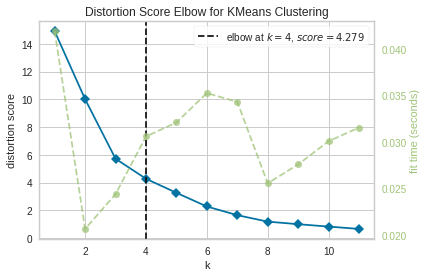

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(PP_predmety_rozlozeni_znamek)
visualizer.show()

### Rozdělení do 3 shluků
* Ukázka rozdělení předmětů do tří shluků
* Předměty jsou rozděleny pouze na matematické, programovací a zbytek

In [65]:
km = KMeans(n_clusters=3).fit(PP_predmety_rozlozeni_znamek)

In [66]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = PP_predmety_rozlozeni_znamek.index.values
cluster_map['cluster'] = km.labels_

In [67]:
cluster_map

,data_index,cluster
0,BI-PA1,0
1,BI-PAI,1
2,BI-CAO,1
3,BI-PS1,0
4,BI-MLO,2
5,BI-ZMA,2
6,BI-PA2,0
7,BI-DBS,1
8,BI-SAP,1
9,BI-LIN,2


### Rozdělení do 4 shluků
* Ukázka rozdělení do čtyř shluků
* Předměty jsou rozděleny na matematické, programovací, lehké předměty a zbytek

In [68]:
km = KMeans(n_clusters=4).fit(PP_predmety_rozlozeni_znamek)

In [69]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = PP_predmety_rozlozeni_znamek.index.values
cluster_map['cluster'] = km.labels_

In [70]:
# Prvni shluk
cluster_map[cluster_map.cluster == 0].data_index.unique()

array(['BI-MLO', 'BI-ZMA', 'BI-LIN', 'BI-ZDM', 'BI-PST'], dtype=object)

In [71]:
# Druhy shluk
cluster_map[cluster_map.cluster == 1].data_index.unique()

array(['BI-CAO', 'BI-DBS', 'BI-SAP', 'BI-AAG', 'BI-PSI', 'BI-BEZ',
       'BI-DPR', 'BI-SI1.2', 'BI-EMP'], dtype=object)

In [72]:
# Treti shluk
cluster_map[cluster_map.cluster == 2].data_index.unique()

array(['BI-PA1', 'BI-PS1', 'BI-PA2', 'BI-AG1', 'BI-OSY'], dtype=object)

In [73]:
# Ctvrty shluk
cluster_map[cluster_map.cluster == 3].data_index.unique()

array(['BI-PAI'], dtype=object)

# Matice klasifikace
* Řádky přestavují jednotlivé studenty, sloupce PP předměty

## Bakalář

In [74]:
#matice klasifikace bakalar
courses_matrix_bak = pd.DataFrame(index=student_studium_id_bak, columns=courses_kod_bak)  

for index, row in klasifikace_fact_bak_09[klasifikace_fact_bak_09.predmet_id.isin(courses_id_bak)].iterrows():
    if not math.isnan(row['znamka']):
        courses_matrix_bak[courses_tran_id_kod[row['predmet_id']]][row['studium_id']] = row['znamka']

In [75]:
path_file = os.sep.join(['created_data', 'courses_matrix_bak.csv'])
courses_matrix_bak.to_csv(path_file, index=True, index_label='studium_id')

## Magistr

In [76]:
#matice klasifikace bakalar
courses_matrix_mag = pd.DataFrame(index=student_studium_id_mag, columns=courses_kod_mag)  

for index, row in klasifikace_fact_mag_09[klasifikace_fact_mag_09.predmet_id.isin(courses_id_mag)].iterrows():
    if not math.isnan(row['znamka']):
        courses_matrix_mag[courses_tran_id_kod[row['predmet_id']]][row['studium_id']] = row['znamka']

In [77]:
path_file = os.sep.join(['created_data', 'courses_matrix_mag.csv'])
courses_matrix_mag.to_csv(path_file, index=True, index_label='studium_id')

# Úspěšní a neúspěšní studenti

In [78]:
# uspesni studenti bakalar
successful_students_bak = student_studium_dim_bak[(student_studium_dim_bak['ukonceni_zpusob'] == 1)]['studium_id'].unique()
# neuspesni studetni bakalar
failed_students_bak = student_studium_dim_bak[(student_studium_dim_bak['ukonceni_zpusob'] != 1)
                             & (student_studium_dim_bak['ukonceni_zpusob'].notna())]['studium_id'].unique()

# uspesni studenti magistr
successful_students_mag = student_studium_dim_mag[(student_studium_dim_mag['ukonceni_zpusob'] == 1)]['studium_id'].unique()
# neuspesni studenti magistr
failed_students_mag = student_studium_dim_mag[(student_studium_dim_mag['ukonceni_zpusob'] != 1)
                             & (student_studium_dim_mag['ukonceni_zpusob'].notna())]['studium_id'].unique()

In [79]:
path_file = os.sep.join(['created_data', 'failed_students_bak.npy'])
save(path_file, failed_students_bak)
path_file = os.sep.join(['created_data', 'successful_students_bak.npy'])
save(path_file, successful_students_bak)

path_file = os.sep.join(['created_data', 'failed_students_mag.npy'])
save(path_file, failed_students_mag)
path_file = os.sep.join(['created_data', 'successful_students_mag.npy'])
save(path_file, successful_students_mag)

# Matrix_bak / matrix_mag
* Vytvoření datasetů pro predikci úspěchu dokončení studia
* Matrix_bak pro bakaláře
* Matrix_mag pro magistra
* Obsahují informace z studium_dim, student_dim, courses_matrix_bak/courses_matrix_mag

In [80]:
# studium_sub a student_sub

# nahrazeni datumu zahajeni studia a roku maturity, jejich rozdilem
# pokud chybi rok maturity ve studium_dim vezmu hodnotu z prihlaska_dim
# pokud jedna z hodnot chybi je hodnota nahrazena pomoci kNN
studium_sub = student_studium_dim[['studium_id', 'datum_zahajeni', 'rok_maturity']].copy(deep=True)
# puvodne byl chybejici rok maturity nahrazen hodnotou 0, 
# zmeneno zpet na NaN kvuli naslednemu doplneni Imputerem
studium_sub.rok_maturity.replace(0, np.nan, inplace=True)

In [81]:
# doplneni rokem maturity z prihlaska_dim
#rok_maturity_prihl_ids = prihlaska_dim[prihlaska_dim.rok_maturity.notna()].studium_id.unique()
students_not_rok_maturity = studium_sub[studium_sub.rok_maturity.isna()].studium_id.unique()
len(students_not_rok_maturity)
for student in students_not_rok_maturity:
    rok_z_prihlasky = prihlaska_dim[(prihlaska_dim.studium_id == student)].maturita_rok.dropna()
    if len(rok_z_prihlasky) > 0:
        studium_sub.loc[studium_sub.studium_id == student, 'rok_maturity'] = rok_z_prihlasky.values[0]

In [82]:
studium_sub.set_index('studium_id', inplace=True)

In [83]:
# Doplneni chybejicich hodnot pomoci KNNImputeru
imputer = KNNImputer(n_neighbors=5, weights='distance')
studium_sub = pd.DataFrame(imputer.fit_transform(studium_sub), index=studium_sub.index, columns=studium_sub.columns)

In [84]:
studium_sub = studium_sub.round({'rok_maturity': 0})

# Pridani atributu maturita_nastup_rozdil = rozdil mezi datem zahajeni a rokem maturity
studium_sub['maturita_nastup_rozdil'] = studium_sub['datum_zahajeni'] - studium_sub['rok_maturity']

In [85]:
# nahrazeni sloupce statni_prislusnost_nazev, novym sloupcem je_cech 
# (1 - pokud ano, 0 - pokud ne, -1 - pokud neni statni prislusnost vyplnena)
student_sub = student_studium_dim[['studium_id', 'pohlavi_kod', 'statni_prislusnost_nazev']].copy(deep=True)
student_sub['je_cech'] = math.nan
student_sub.loc[student_sub.statni_prislusnost_nazev == 'Česko', 'je_cech'] = 1
student_sub.loc[student_sub.statni_prislusnost_nazev != 'Česko', 'je_cech'] = 0
student_sub.loc[student_sub.statni_prislusnost_nazev.isna(), 'je_cech'] = -1
student_sub = student_sub.drop(columns='statni_prislusnost_nazev')

# nastaveni chybejicich hodnot pohlavi_kod na -1
student_sub.loc[student_sub.pohlavi_kod.isna(), 'pohlavi_kod'] = -1

In [86]:
# spojeni student_sub a studium_sub
matrix_sub = student_sub.merge(studium_sub, how='inner', left_on='studium_id', right_index=True)

# pripojeni info o stredni skole
# pripojeni info o tom jestli je z Prahy
# pripojeni info o prijimackach
matrix_sub = matrix_sub.merge(student_studium_dim[['studium_id', 'gymnazium', 'praha', 'scio', 'olym', 'zkouska', 'prominuti']], how='inner', on='studium_id')

# prejmenovani M muze na 0 a Z zena na 1
matrix_sub = matrix_sub.replace('M', 0)
matrix_sub = matrix_sub.replace('Z', 1)

# zmena atributu na int hodnoty
matrix_sub['rok_maturity'] = matrix_sub['rok_maturity'].astype('int')
matrix_sub['je_cech'] = matrix_sub['je_cech'].astype('int')
matrix_sub['datum_zahajeni'] = matrix_sub['datum_zahajeni'].astype('int')
matrix_sub['maturita_nastup_rozdil'] = matrix_sub['maturita_nastup_rozdil'].astype('int')
matrix_sub['pohlavi_kod'] = matrix_sub['pohlavi_kod'].astype('int')

# odstraneni duplikatu
matrix_sub.drop_duplicates(subset=['studium_id'], inplace=True)

## Matrix_bak

In [87]:
matrix_bak = matrix_sub.copy(deep=True)

# doplneni sloupce s infem o uspesne/neuspesnem dostudovani, beru pouze uz dostudovane
matrix_bak['dostudoval_uspesne'] = 0

matrix_bak.loc[matrix_bak.studium_id.isin(successful_students_bak), 'dostudoval_uspesne'] = 1
matrix_bak.drop(matrix_bak[(~matrix_bak.studium_id.isin(failed_students_bak))
                          & (~matrix_bak.studium_id.isin(successful_students_bak))].index, inplace=True)

In [88]:
# pridani znamek z PP predmetu
matrix_bak = matrix_bak.merge(courses_matrix_bak, how='inner', left_on='studium_id', right_index=True)

# nastaveni indexu
matrix_bak.set_index('studium_id', inplace=True)

In [89]:
path_file = os.sep.join(['created_data', 'matrix_bak.csv'])
matrix_bak.to_csv(path_file, index=True, index_label='studium_id')

### Pouze studenti s nástupem 2015 a výš

In [90]:
matrix_bak_2015 = matrix_bak[matrix_bak.datum_zahajeni >= 2015]

In [91]:
path_file = os.sep.join(['created_data', 'matrix_bak_2015.csv'])
matrix_bak_2015.to_csv(path_file, index=True, index_label='studium_id')

## Matrix_mag

In [92]:
matrix_mag = matrix_sub.copy(deep=True)

# doplneni sloupce s infem o uspesne/neuspesnem dostudovani, beru pouze uz dostudovane
matrix_mag['dostudoval_uspesne'] = 0

matrix_mag.loc[matrix_mag.studium_id.isin(successful_students_mag), 'dostudoval_uspesne'] = 1
matrix_mag.drop(matrix_mag[(~matrix_mag.studium_id.isin(failed_students_mag))
                          & (~matrix_mag.studium_id.isin(successful_students_mag))].index, inplace=True)

In [93]:
matrix_mag[matrix_mag.pohlavi_kod.isna()]

,studium_id,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti,dostudoval_uspesne


In [94]:
# pridani znamek z PP predmetu
matrix_mag = matrix_mag.merge(courses_matrix_mag, how='inner', left_on='studium_id', right_index=True)

# zmena pohlavi_kod na int
matrix_mag['pohlavi_kod'] = matrix_mag['pohlavi_kod'].astype('int')

# nastaveni indexu
matrix_mag.set_index('studium_id', inplace=True)

In [95]:
path_file = os.sep.join(['created_data', 'matrix_mag.csv'])
matrix_mag.to_csv(path_file, index=True, index_label='studium_id')

### Rok nástupu 2016 a výš

In [96]:
matrix_mag_2016 = matrix_mag[matrix_mag.datum_zahajeni >= 2016]

In [97]:
path_file = os.sep.join(['created_data', 'matrix_mag_2016.csv'])
matrix_mag_2016.to_csv(path_file, index=True, index_label='studium_id')

# Rozdělení po semestrech

In [98]:
# Pomocne promenne

# Sociodemograficka data vyuzita v datasetu pro predikci pruchodu prvnim semestrem 
personal_attributes = ['studium_id', 'pohlavi_kod', 'je_cech', 'datum_zahajeni', 'rok_maturity', 'maturita_nastup_rozdil',
                        'gymnazium', 'praha', 'scio', 'olym', 'zkouska', 'prominuti']
target = ['dostudoval_uspesne']

In [99]:
# Pouze studenti s rokem nastupu 2015 a vys
student_studium_dim_2015 = student_studium_dim[student_studium_dim.datum_zahajeni >= 2015].copy(deep=True)

In [100]:
# Prida ke kazdemu studentovi info o kodech jednotlivych semestru
# Kody prvnich sesti semestru studenta jsou zjisteny z atributu datum_zahajeni 

for year in range(15, 23):
    for semester in range (0,6):
        semester_name = f"semestr_{semester+1}"
        student_studium_dim_2015.loc[(student_studium_dim_2015.datum_zahajeni == year+2000), semester_name] = f"B{year+semester//2}{semester%2+1}"

## Vypočtení neúspěšného semestru

In [101]:
# Podle mesice ukonceni a rocniku urcime semestr, ve kterem student neuspel
# - Pokud je mesic ukonceni v mesicich rijen, listopad, prosinec, leden, unor, tak skoncil v zimnim semestru
# - Pokud ostatni mesice, skoncil v letnim semestru

student_studium_dim_2015['semestr_neuspech'] = np.nan

for index, row in student_studium_dim_2015.iterrows():
    if row.studuje == 'K' and  row.ukonceni_zpusob != 1:
        date = datetime.strptime(studium_dim_o.loc[studium_dim_o.studium_id == row.studium_id].datum_ukonceni.iloc[0], '%Y-%m-%d')
        if date.month in [3,4,5,6,7,8,9]:
            student_studium_dim_2015.loc[student_studium_dim_2015.studium_id == row.studium_id, 'semestr_neuspech'] = 2 * (row.rocnik - 1) + 2
        elif date.month in [10,11,12,1,2]:
            student_studium_dim_2015.loc[student_studium_dim_2015.studium_id == row.studium_id, 'semestr_neuspech'] = 2 * (row.rocnik - 1) + 1

## Počet kreditů v jednotlivých semestrech

In [102]:
# Zjisteni kolik kreditu studenti ziskaji v jednotlivych semestrech

student_studium_dim_2015['semestr_1_kredity'] = 0
student_studium_dim_2015['semestr_2_kredity'] = 0
student_studium_dim_2015['semestr_3_kredity'] = 0
student_studium_dim_2015['semestr_4_kredity'] = 0
student_studium_dim_2015['semestr_5_kredity'] = 0
student_studium_dim_2015['semestr_6_kredity'] = 0

all_courses = predmet_dim.predmet_id.unique()
# Jen studenti s rokem nastupu 2015 a vys
all_students_2015 = student_studium_dim_2015.studium_id.unique()
klasifikace = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id.str.startswith('B'))
                                                 & (klasifikace_fact_changed.znamka != 4)
                                                 & (klasifikace_fact_changed.znamka.notna())
                                                 & (klasifikace_fact_changed.studium_id.isin(all_students_2015))]
for course in all_courses:
    course_credits = predmet_dim[predmet_dim.predmet_id == course].iloc[0]['pocet_kreditu']
    course_klasifikace = klasifikace[(klasifikace.predmet_id == course)]
    
    for index, row in course_klasifikace.iterrows():
        semestr = row.semestr_id
        student_id = row.studium_id
        
        student = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == student_id), :]
        semestr = int(semestr[1:])-(student.iloc[0]['datum_zahajeni']-2000)*10
        semestr = semestr//10 * 2 + semestr%10
        if semestr > 0 and semestr < 7:
            student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == student_id), f'semestr_{semestr}_kredity'] += course_credits

In [103]:
# Aktualni a predchozi semestr nebereme v potaz, protoze nemuzeme zjistit, zda student prosel dalsim semestrem
valid_semesters = ['B151', 'B152', 'B161', 'B162', 'B171', 'B172', 'B181', 'B182', 'B191', 'B192', 'B201', 'B202']

## První semestr

In [104]:
# Matrix na zjisteni pruchodu prvnim semestrem

# Bereme v potaz jen studenty bakalarskeho studia
# Neberu v potaz studenty, kteri uspesne dokoncili za mene nez tri roky (naprosta vetsina budou opakovaci)
matrix_semestr_1 = pd.DataFrame(index=student_studium_dim_2015.loc[(student_studium_dim_2015.typ_programu == 'B') &
                                                                   ((student_studium_dim_2015.ukonceni_zpusob != 1) | (student_studium_dim_2015.rocnik >=3))
                                    , 'studium_id'], columns = [])

# Zde se muzu oprit jen o sociodemograficka data. 

In [105]:
# Vyhodnoceni dokonceni semestru

for index, row in matrix_semestr_1.iterrows():
    pocet_kreditu_semestr_1 = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_1_kredity'].iloc[0]
    
    if pocet_kreditu_semestr_1 < 15:
        matrix_semestr_1.loc[(matrix_semestr_1.index == index), 'dokoncil_semestr'] = 0           
    else:
        matrix_semestr_1.loc[(matrix_semestr_1.index == index), 'dokoncil_semestr'] = 1

In [106]:
# pridani osobnich informaci o studentech
matrix_semestr_1_personal = matrix_semestr_1.merge(matrix_sub[personal_attributes], left_index=True, right_on='studium_id', how='inner')

In [107]:
matrix_semestr_1_personal.set_index('studium_id', inplace=True)
matrix_semestr_1_personal.head()

,dokoncil_semestr,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti
studium_id,,,,,,,,,,,,
11736906,0.0,0,1,2015,2009,6,1,0,0,0,0,0
14267106,1.0,0,1,2017,2009,8,0,1,0,0,0,0
12032306,0.0,0,1,2015,2007,8,0,1,0,0,0,0
15613006,1.0,0,1,2018,2009,9,1,1,0,0,0,0
12948006,1.0,1,1,2016,2010,6,1,0,0,0,0,0


In [108]:
path_file = os.sep.join(['created_data', 'matrix_semestr_1_personal.csv'])
matrix_semestr_1_personal.to_csv(path_file, index=True, index_label='studium_id')

## Druhý semestr

In [109]:
# Matrix na zjisteni pruchodu druhym semestrem, berou se v potaz predmety s prvniho semestru

# Prekopiruji uspesne studenty z prvniho semestru    
matrix_semestr_2 = matrix_semestr_1[(matrix_semestr_1.dokoncil_semestr == 1)].copy(deep=True)

for course in courses_1:
    matrix_semestr_2[f"{course}_znamka"] = np.nan
    matrix_semestr_2[f"{course}_poradi_zapisu"] = np.nan
    
for index in matrix_semestr_2.index.unique():
    semester_name = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_1'].iloc[0]
    # Studoval student dany semestr ve validnim semestru (tedy mame pro nej jiz vysledky v datech a zname i nadchazejici semestr)
    if semester_name not in valid_semesters:
        continue
    # Klasifikace studenta za dany semestr + pomocnych semestru s predmety z minulych studii
    semester_names = [semester_name, 'A00', 'A000', '0000']
    classification = klasifikace_fact_changed[(klasifikace_fact_changed.studium_id == index)
                                  & (klasifikace_fact_changed.semestr_id.isin(semester_names))]
    
    # Znamky za prvni semestr
    for course in courses_1:
        course_id = courses_tran_kod_id[course]
        course_classification = classification[(classification.predmet_id == course_id)].sort_values(by=['poradi_zapisu'], ascending=False)

        # Student dany predmet studoval
        if len(course_classification) >= 1:
            matrix_semestr_2.loc[(matrix_semestr_2.index == index), f"{course}_znamka"] = course_classification.iloc[0]['znamka']
            matrix_semestr_2.loc[(matrix_semestr_2.index == index), f"{course}_poradi_zapisu"] = course_classification.iloc[0]['poradi_zapisu']
        # Student dany predmet tento semestr nemel, vyplnime do matrixu nuly
        if len(course_classification) == 0:
            matrix_semestr_2.loc[(matrix_semestr_2.index == index), f"{course}_znamka"] = -1
            matrix_semestr_2.loc[(matrix_semestr_2.index == index), f"{course}_poradi_zapisu"] = -1          

# Vyhodit radky s NaN hodnoty - jsou to studenti, kteri dany nebo nasledujici semestr jeste nestudovali (budou je mit v budoucnu)
matrix_semestr_2 = matrix_semestr_2.dropna() 

In [110]:
# Vyhodnoceni dokonceni semestru
for index, row in matrix_semestr_2.iterrows():
    pocet_kreditu_semestr_1 = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_1_kredity'].iloc[0]
    pocet_kreditu_semestr_2 = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_2_kredity'].iloc[0]
    
    matrix_semestr_2.loc[(matrix_semestr_2.index == index), 'pocet_kreditu_semestr_1'] = pocet_kreditu_semestr_1
 
    if pocet_kreditu_semestr_1 + pocet_kreditu_semestr_2 < 30:
        matrix_semestr_2.loc[(matrix_semestr_2.index == index), 'dokoncil_semestr'] = 0          
    else:
        matrix_semestr_2.loc[(matrix_semestr_2.index == index), 'dokoncil_semestr'] = 1

In [111]:
matrix_semestr_2.head()

,dokoncil_semestr,BI-PA1_znamka,BI-PA1_poradi_zapisu,BI-PAI_znamka,BI-PAI_poradi_zapisu,BI-CAO_znamka,BI-CAO_poradi_zapisu,BI-PS1_znamka,BI-PS1_poradi_zapisu,BI-MLO_znamka,BI-MLO_poradi_zapisu,BI-ZMA_znamka,BI-ZMA_poradi_zapisu,pocet_kreditu_semestr_1
studium_id,,,,,,,,,,,,,,
14267106,1.0,1.5,1.0,1.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,-1.0,-1.0,24.0
15613006,1.0,1.0,1.0,2.5,1.0,1.0,1.0,4.0,1.0,1.5,1.0,2.0,1.0,16.0
12948006,1.0,3.0,1.0,2.0,1.0,1.5,1.0,2.5,1.0,1.5,1.0,2.5,1.0,30.0
12967806,1.0,1.0,1.0,2.5,1.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,30.0
13016006,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.5,1.0,2.5,1.0,25.0


In [112]:
path_file = os.sep.join(['created_data', 'matrix_semestr_2.csv'])
matrix_semestr_2.to_csv(path_file, index=True, index_label='studium_id')

## Třetí semestr

In [113]:
# treti semestr
matrix_semestr_3 = matrix_semestr_2[(matrix_semestr_2.dokoncil_semestr == 1)].copy(deep=True)

for course in courses_2:
    matrix_semestr_3[f"{course}_znamka"] = np.nan
    matrix_semestr_3[f"{course}_poradi_zapisu"] = np.nan
    
courses_12 = list(courses_1)
courses_12.extend(courses_2)

for index in matrix_semestr_3.index.unique():
    semester_name = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_2'].iloc[0]
    if semester_name not in valid_semesters:
        continue
    # Klasifikace studenta za dany semestr + pomocnych semestru s predmety z minulych studii
    semester_names = [semester_name, 'A00', 'A000', '0000']
    classification = klasifikace_fact_changed[(klasifikace_fact_changed.studium_id == index)
                                  & (klasifikace_fact_changed.semestr_id.isin(semester_names))]
    
    # Znamky za druhy semestr, zkontrolovat i zda si nezapsali znova predmety z predchozich semestru
    for course in courses_12:
        course_id = courses_tran_kod_id[course]
        course_classification = classification[(classification.predmet_id == course_id)].sort_values(by=['poradi_zapisu'], ascending=False)
            
        if len(course_classification) >= 1:
            matrix_semestr_3.loc[(matrix_semestr_3.index == index), f"{course}_znamka"] = course_classification.iloc[0]['znamka']
            matrix_semestr_3.loc[(matrix_semestr_3.index == index), f"{course}_poradi_zapisu"] = course_classification.iloc[0]['poradi_zapisu']
        if len(course_classification) == 0:
            # Neprepsat si znamky z minulych semestru
            if len(matrix_semestr_3.loc[(matrix_semestr_3.index == index) & (matrix_semestr_3[f"{course}_znamka"] != 0) & (matrix_semestr_3[f"{course}_znamka"].notna())]) != 1:
                matrix_semestr_3.loc[(matrix_semestr_3.index == index), f"{course}_znamka"] = -1
                matrix_semestr_3.loc[(matrix_semestr_3.index == index), f"{course}_poradi_zapisu"] = -1          

# Vyhodit NaN řádky - jsou to studenti, kteri dany nebo nasledujici semestr jeste nestudovali (budou je mit v budoucnu)
matrix_semestr_3 = matrix_semestr_3.dropna()

In [114]:
# Vyhodnoceni dokonceni tretiho semestru

# Podle priznaku semestr_neuspech
for index, row in matrix_semestr_3.iterrows():
    matrix_semestr_3.loc[(matrix_semestr_3.index == index), 'pocet_kreditu_semestr_2'] = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_2_kredity'].iloc[0]
    
    if student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_neuspech'].iloc[0] == 3:
        matrix_semestr_3.loc[(matrix_semestr_3.index == index), 'dokoncil_semestr'] = 0          
    else:
        matrix_semestr_3.loc[(matrix_semestr_3.index == index), 'dokoncil_semestr'] = 1

In [115]:
matrix_semestr_3.head()

,dokoncil_semestr,BI-PA1_znamka,BI-PA1_poradi_zapisu,BI-PAI_znamka,BI-PAI_poradi_zapisu,BI-CAO_znamka,BI-CAO_poradi_zapisu,BI-PS1_znamka,BI-PS1_poradi_zapisu,BI-MLO_znamka,BI-MLO_poradi_zapisu,BI-ZMA_znamka,BI-ZMA_poradi_zapisu,pocet_kreditu_semestr_1,BI-PA2_znamka,BI-PA2_poradi_zapisu,BI-DBS_znamka,BI-DBS_poradi_zapisu,BI-SAP_znamka,BI-SAP_poradi_zapisu,BI-LIN_znamka,BI-LIN_poradi_zapisu,pocet_kreditu_semestr_2
studium_id,,,,,,,,,,,,,,,,,,,,,,,
14267106,1.0,1.5,1.0,1.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,-1.0,-1.0,24.0,1.5,1.0,1.5,1.0,1.0,1.0,-1.0,-1.0,22.0
15613006,1.0,1.0,1.0,2.5,1.0,1.0,1.0,4.0,1.0,1.5,1.0,2.0,1.0,16.0,1.5,1.0,1.5,1.0,1.0,1.0,3.0,1.0,17.0
12948006,1.0,3.0,1.0,2.0,1.0,1.5,1.0,2.5,1.0,1.5,1.0,2.5,1.0,30.0,2.5,1.0,2.0,1.0,1.0,1.0,3.0,1.0,34.0
12967806,1.0,1.0,1.0,2.5,1.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,30.0,4.0,1.0,2.5,1.0,1.0,1.0,2.5,1.0,21.0
13016006,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.5,1.0,2.5,1.0,25.0,2.0,1.0,2.5,1.0,4.0,1.0,2.5,1.0,17.0


In [116]:
path_file = os.sep.join(['created_data', 'matrix_semestr_3.csv'])
matrix_semestr_3.to_csv(path_file, index=True, index_label='studium_id')

## Čtvrtý semestr

In [117]:
# ctvrty semestr
matrix_semestr_4 = matrix_semestr_3[(matrix_semestr_3.dokoncil_semestr == 1)].copy(deep=True)

for course in courses_3:
    matrix_semestr_4[f"{course}_znamka"] = np.nan
    matrix_semestr_4[f"{course}_poradi_zapisu"] = np.nan
    
courses_123 = list(courses_12)
courses_123.extend(courses_3)

for index in matrix_semestr_4.index.unique():
    semester_name = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_3'].iloc[0]
    if semester_name not in valid_semesters:
        continue
    # Klasifikace studenta za dany semestr + pomocnych semestru s predmety z minulych studii
    semester_names = [semester_name, 'A00', 'A000', '0000']
    classification = klasifikace_fact_changed[(klasifikace_fact_changed.studium_id == index)
                                  & (klasifikace_fact_changed.semestr_id.isin(semester_names))]
    
    # Znamky za treti semestr, zkontrolovat i zda si nezapsali znova predmety z predchozich semestru
    for course in courses_123:
        course_id = courses_tran_kod_id[course]
        course_classification = classification[(classification.predmet_id == course_id)].sort_values(by=['poradi_zapisu'], ascending=False)
        
        if len(course_classification) >= 1:
            matrix_semestr_4.loc[(matrix_semestr_4.index == index), f"{course}_znamka"] = course_classification.iloc[0]['znamka']
            matrix_semestr_4.loc[(matrix_semestr_4.index == index), f"{course}_poradi_zapisu"] = course_classification.iloc[0]['poradi_zapisu']
        if len(course_classification) == 0:
            # Neprepsat si znamky z minulych semestru
            if len(matrix_semestr_4.loc[(matrix_semestr_4.index == index) & (matrix_semestr_4[f"{course}_znamka"] != 0) & (matrix_semestr_4[f"{course}_znamka"].notna())]) != 1:
                matrix_semestr_4.loc[(matrix_semestr_4.index == index), f"{course}_znamka"] = -1
                matrix_semestr_4.loc[(matrix_semestr_4.index == index), f"{course}_poradi_zapisu"] = -1         

# Vyhodit NaN řádky - jsou to studenti, kteri dany nebo nasledujici semestr jeste nestudovali (budou je mit v budoucnu)
matrix_semestr_4 = matrix_semestr_4.dropna()             

In [118]:
# Vyhodnoceni dokonceni ctvrteho semestru

# Ze tretiho a ctvrteho semestru musi mit student aspon 40 kreditu
for index, row in matrix_semestr_4.iterrows():
    pocet_kreditu_semestr_3 = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_3_kredity'].iloc[0]
    pocet_kreditu_semestr_4 = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_4_kredity'].iloc[0]
        
    matrix_semestr_4.loc[(matrix_semestr_4.index == index), 'pocet_kreditu_semestr_3'] = pocet_kreditu_semestr_3
    if pocet_kreditu_semestr_3 + pocet_kreditu_semestr_4 < 40:
        matrix_semestr_4.loc[(matrix_semestr_4.index == index), 'dokoncil_semestr'] = 0          
    else:
        matrix_semestr_4.loc[(matrix_semestr_4.index == index), 'dokoncil_semestr'] = 1

In [119]:
matrix_semestr_4.head()

,dokoncil_semestr,BI-PA1_znamka,BI-PA1_poradi_zapisu,BI-PAI_znamka,BI-PAI_poradi_zapisu,BI-CAO_znamka,BI-CAO_poradi_zapisu,BI-PS1_znamka,BI-PS1_poradi_zapisu,BI-MLO_znamka,BI-MLO_poradi_zapisu,BI-ZMA_znamka,BI-ZMA_poradi_zapisu,pocet_kreditu_semestr_1,BI-PA2_znamka,BI-PA2_poradi_zapisu,BI-DBS_znamka,BI-DBS_poradi_zapisu,BI-SAP_znamka,BI-SAP_poradi_zapisu,BI-LIN_znamka,BI-LIN_poradi_zapisu,pocet_kreditu_semestr_2,BI-AAG_znamka,BI-AAG_poradi_zapisu,BI-ZDM_znamka,BI-ZDM_poradi_zapisu,BI-AG1_znamka,BI-AG1_poradi_zapisu,pocet_kreditu_semestr_3
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14267106,1.0,1.5,1.0,1.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,24.0,1.5,1.0,1.5,1.0,1.0,1.0,-1.0,-1.0,22.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,20.0
15613006,0.0,1.0,1.0,2.5,1.0,1.0,1.0,2.5,2.0,1.5,1.0,2.0,1.0,16.0,1.5,1.0,1.5,1.0,1.0,1.0,3.0,1.0,17.0,2.5,1.0,2.0,1.0,-1.0,-1.0,14.0
12948006,1.0,3.0,1.0,2.0,1.0,1.5,1.0,2.5,1.0,1.5,1.0,2.5,1.0,30.0,2.5,1.0,2.0,1.0,1.0,1.0,3.0,1.0,34.0,2.0,1.0,2.0,1.0,2.5,1.0,35.0
12967806,0.0,1.0,1.0,2.5,1.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,30.0,4.0,1.0,2.5,1.0,1.0,1.0,2.5,1.0,21.0,2.0,1.0,2.0,1.0,1.0,1.0,14.0
13016006,0.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.5,1.0,2.5,1.0,25.0,2.0,1.0,2.5,1.0,4.0,1.0,2.5,1.0,17.0,1.5,1.0,3.0,2.0,-1.0,-1.0,20.0


In [120]:
path_file = os.sep.join(['created_data', 'matrix_semestr_4.csv'])
matrix_semestr_4.to_csv(path_file, index=True, index_label='studium_id')

## Pátý semestr

In [121]:
# paty semestr
matrix_semestr_5 = matrix_semestr_4[(matrix_semestr_4.dokoncil_semestr == 1)].copy(deep=True)

for course in courses_4:
    matrix_semestr_5[f"{course}_znamka"] = np.nan
    matrix_semestr_5[f"{course}_poradi_zapisu"] = np.nan
    
courses_1234 = list(courses_123)
courses_1234.extend(courses_4)

for index in matrix_semestr_5.index.unique():
    semester_name = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_4'].iloc[0]
    if semester_name not in valid_semesters:
        continue
    # Klasifikace studenta za dany semestr + pomocnych semestru s predmety z minulych studii
    semester_names = [semester_name, 'A00', 'A000', '0000']
    classification = klasifikace_fact_changed[(klasifikace_fact_changed.studium_id == index)
                                  & (klasifikace_fact_changed.semestr_id.isin(semester_names))]
    # Znamky za ctvrty semestr, zkontrolovat i zda si nezapsali znova predmety z predchozich semestru
    for course in courses_1234:
        course_id = courses_tran_kod_id[course]
        course_classification = classification[(classification.predmet_id == course_id)].sort_values(by=['poradi_zapisu'], ascending=False)
        
        if len(course_classification) >= 1:
            matrix_semestr_5.loc[(matrix_semestr_5.index == index), f"{course}_znamka"] = course_classification.iloc[0]['znamka']
            matrix_semestr_5.loc[(matrix_semestr_5.index == index), f"{course}_poradi_zapisu"] = course_classification.iloc[0]['poradi_zapisu']
        if len(course_classification) == 0:
            # Neprepsat si znamky z minulych semestru
            if len(matrix_semestr_5.loc[(matrix_semestr_5.index == index) & (matrix_semestr_5[f"{course}_znamka"] != 0) & (matrix_semestr_5[f"{course}_znamka"].notna())]) != 1:
                matrix_semestr_5.loc[(matrix_semestr_5.index == index), f"{course}_znamka"] = -1
                matrix_semestr_5.loc[(matrix_semestr_5.index == index), f"{course}_poradi_zapisu"] = -1           

# Vyhodit NaN řádky - jsou to studenti, kteri dany nebo nasledujici semestr jeste nestudovali (budou je mit v budoucnu)
matrix_semestr_5 = matrix_semestr_5.dropna()                    

In [122]:
# Vyhodnoceni dokonceni pateho semestru

# Podle priznaku semestr_neuspech
for index, row in matrix_semestr_5.iterrows():
    matrix_semestr_5.loc[(matrix_semestr_5.index == index), 'pocet_kreditu_semestr_4'] = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_4_kredity'].iloc[0]
    
    if student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_neuspech'].iloc[0] == 5:
        matrix_semestr_5.loc[(matrix_semestr_5.index == index), 'dokoncil_semestr'] = 0          
    else:
        matrix_semestr_5.loc[(matrix_semestr_5.index == index), 'dokoncil_semestr'] = 1

In [123]:
matrix_semestr_5.head()

,dokoncil_semestr,BI-PA1_znamka,BI-PA1_poradi_zapisu,BI-PAI_znamka,BI-PAI_poradi_zapisu,BI-CAO_znamka,BI-CAO_poradi_zapisu,BI-PS1_znamka,BI-PS1_poradi_zapisu,BI-MLO_znamka,BI-MLO_poradi_zapisu,BI-ZMA_znamka,BI-ZMA_poradi_zapisu,pocet_kreditu_semestr_1,BI-PA2_znamka,BI-PA2_poradi_zapisu,BI-DBS_znamka,BI-DBS_poradi_zapisu,BI-SAP_znamka,BI-SAP_poradi_zapisu,BI-LIN_znamka,BI-LIN_poradi_zapisu,pocet_kreditu_semestr_2,BI-AAG_znamka,BI-AAG_poradi_zapisu,BI-ZDM_znamka,BI-ZDM_poradi_zapisu,BI-AG1_znamka,BI-AG1_poradi_zapisu,pocet_kreditu_semestr_3,BI-OSY_znamka,BI-OSY_poradi_zapisu,BI-PSI_znamka,BI-PSI_poradi_zapisu,BI-BEZ_znamka,BI-BEZ_poradi_zapisu,pocet_kreditu_semestr_4
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14267106,1.0,1.5,1.0,1.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,24.0,1.5,1.0,1.5,1.0,1.0,1.0,1.0,1.0,22.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,20.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,21.0
12948006,1.0,3.0,1.0,2.0,1.0,1.5,1.0,2.5,1.0,1.5,1.0,2.5,1.0,30.0,2.5,1.0,2.0,1.0,1.0,1.0,3.0,1.0,34.0,2.0,1.0,2.0,1.0,2.5,1.0,35.0,2.5,1.0,2.5,1.0,2.5,1.0,34.0
12973406,1.0,2.5,1.0,2.5,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.5,1.0,30.0,2.5,2.0,2.5,1.0,1.0,1.0,2.5,1.0,19.0,2.0,1.0,2.5,1.0,2.0,1.0,26.0,2.5,1.0,2.0,1.0,2.5,1.0,33.0
12964406,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.5,1.0,2.5,1.0,3.0,1.0,30.0,4.0,2.0,2.5,1.0,1.0,1.0,3.0,2.0,16.0,3.0,1.0,2.0,1.0,4.0,1.0,22.0,4.0,1.0,2.0,1.0,3.0,1.0,28.0
13013306,1.0,1.5,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.5,1.0,2.0,1.0,27.0,1.0,1.0,2.0,1.0,1.0,1.0,2.5,1.0,30.0,1.0,1.0,2.5,1.0,1.0,1.0,31.0,1.0,1.0,1.0,1.0,1.0,1.0,30.0


In [124]:
path_file = os.sep.join(['created_data', 'matrix_semestr_5.csv'])
matrix_semestr_5.to_csv(path_file, index=True, index_label='studium_id')

## Šestý semestr (pouze pro testování)

In [126]:
# sesty semestr
matrix_semestr_6 = matrix_semestr_5[(matrix_semestr_5.dokoncil_semestr == 1)].copy(deep=True)

for course in courses_5:
    matrix_semestr_5[f"{course}_znamka"] = np.nan
    matrix_semestr_5[f"{course}_poradi_zapisu"] = np.nan
    
courses_12345 = list(courses_1234)
courses_12345.extend(courses_5)

for index in matrix_semestr_6.index.unique():
    semester_name = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_5'].iloc[0]
    if semester_name not in valid_semesters:
        continue
    # Klasifikace studenta za dany semestr + pomocnych semestru s predmety z minulych studii
    semester_names = [semester_name, 'A00', 'A000', '0000']
    classification = klasifikace_fact_changed[(klasifikace_fact_changed.studium_id == index)
                                  & (klasifikace_fact_changed.semestr_id.isin(semester_names))]
    
    # Znamky za paty semestr, zkontrolovat i zda si nezapsali znova predmety z predchozich semestru
    for course in courses_12345:
        course_id = courses_tran_kod_id[course]
        course_classification = classification[(classification.predmet_id == course_id)].sort_values(by=['poradi_zapisu'], ascending=False)
            
        if len(course_classification) >= 1:
            matrix_semestr_6.loc[(matrix_semestr_6.index == index), f"{course}_znamka"] = course_classification.iloc[0]['znamka']
            matrix_semestr_6.loc[(matrix_semestr_6.index == index), f"{course}_poradi_zapisu"] = course_classification.iloc[0]['poradi_zapisu']
        if len(course_classification) == 0:
            # Neprepsat si znamky z minulych semestru
            if len(matrix_semestr_6.loc[(matrix_semestr_6.index == index) & (matrix_semestr_6[f"{course}_znamka"] != 0) & (matrix_semestr_6[f"{course}_znamka"].notna())]) != 1:
                matrix_semestr_6.loc[(matrix_semestr_6.index == index), f"{course}_znamka"] = -1
                matrix_semestr_6.loc[(matrix_semestr_6.index == index), f"{course}_poradi_zapisu"] = -1           

# Vyhodit NaN řádky - jsou to studenti, kteri dany nebo nasledujici semestr jeste nestudovali (budou je mit v budoucnu)
matrix_semestr_6 = matrix_semestr_6.dropna() 

In [127]:
matrix_semestr_6.head()

,dokoncil_semestr,BI-PA1_znamka,BI-PA1_poradi_zapisu,BI-PAI_znamka,BI-PAI_poradi_zapisu,BI-CAO_znamka,BI-CAO_poradi_zapisu,BI-PS1_znamka,BI-PS1_poradi_zapisu,BI-MLO_znamka,BI-MLO_poradi_zapisu,BI-ZMA_znamka,BI-ZMA_poradi_zapisu,pocet_kreditu_semestr_1,BI-PA2_znamka,BI-PA2_poradi_zapisu,BI-DBS_znamka,BI-DBS_poradi_zapisu,BI-SAP_znamka,BI-SAP_poradi_zapisu,BI-LIN_znamka,BI-LIN_poradi_zapisu,pocet_kreditu_semestr_2,BI-AAG_znamka,BI-AAG_poradi_zapisu,BI-ZDM_znamka,BI-ZDM_poradi_zapisu,BI-AG1_znamka,BI-AG1_poradi_zapisu,pocet_kreditu_semestr_3,BI-OSY_znamka,BI-OSY_poradi_zapisu,BI-PSI_znamka,BI-PSI_poradi_zapisu,BI-BEZ_znamka,BI-BEZ_poradi_zapisu,pocet_kreditu_semestr_4,BI-PST_znamka,BI-PST_poradi_zapisu
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14267106,1.0,1.5,1.0,1.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,24.0,1.5,1.0,1.5,1.0,1.0,1.0,1.0,1.0,22.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,21.0,-1.0,-1.0
12948006,1.0,3.0,1.0,2.0,1.0,1.5,1.0,2.5,1.0,1.5,1.0,2.5,1.0,30.0,2.5,1.0,2.0,1.0,1.0,1.0,3.0,1.0,34.0,2.0,1.0,2.0,1.0,2.5,1.0,35.0,2.5,1.0,2.5,1.0,2.5,1.0,34.0,2.0,1.0
12973406,1.0,2.5,1.0,2.5,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.5,1.0,30.0,2.5,2.0,2.5,1.0,1.0,1.0,2.5,1.0,19.0,2.0,1.0,2.5,1.0,2.0,1.0,26.0,2.5,1.0,2.0,1.0,2.5,1.0,33.0,2.5,1.0
12964406,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.5,1.0,2.5,1.0,3.0,1.0,30.0,4.0,2.0,2.5,1.0,1.0,1.0,3.0,2.0,16.0,3.0,1.0,2.0,1.0,4.0,1.0,22.0,4.0,1.0,2.0,1.0,3.0,1.0,28.0,-1.0,-1.0
13013306,1.0,1.5,1.0,1.5,2.0,1.0,1.0,1.0,1.0,1.5,1.0,2.0,1.0,27.0,1.0,1.0,2.0,1.0,1.0,1.0,2.5,1.0,30.0,1.0,1.0,2.5,1.0,1.0,1.0,31.0,1.0,1.0,1.0,1.0,1.0,1.0,30.0,1.5,1.0


In [128]:
path_file = os.sep.join(['created_data', 'matrix_semestr_6_test.csv'])
matrix_semestr_6.to_csv(path_file, index=True, index_label='studium_id')